In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3,random_state=1,stratify=y)

In [5]:
print('Labels counts in y:', np.bincount(y))

Labels counts in y: [50 50 50]


In [6]:
print('Labels counts in y_train:', np.bincount(y_train))

Labels counts in y_train: [35 35 35]


In [7]:
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y_test: [15 15 15]


In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [9]:
from sklearn.linear_model import Perceptron

In [10]:
ppn=Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [11]:
y_pred=ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test!=y_pred).sum())

Misclassified samples: 1


In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy: %2f' % ppn.score(X_test_std,y_test))

Accuracy: 0.977778


In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, 
                          resolution=0.02):
    # definimos el generador del marcador y mapa de colores
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    #se representa la superficie de decision
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],
                    alpha=0.8,c=colors[idx],
                    marker=markers[idx],label=cl,
                    edgecolor='black')
        
    #destacamos las muestras de prueba
    if test_idx:
        #representamos todas las muestras
        X_test, y_test=X[test_idx,:], y[test_idx]
        
        plt.scatter(X_test[:,0],X_test[:,1],
                    c='grey', edgecolor='black', alpha=0.25,
                    linewidth=1,marker='o',
                    s=100,label='test set')

/tmp/ipykernel_2202/3352630710.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],


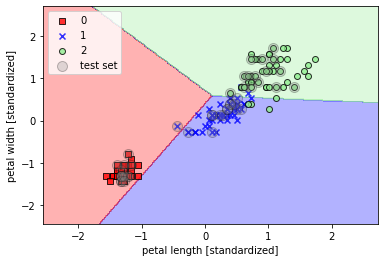

In [14]:
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

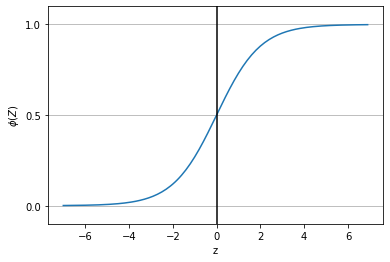

In [15]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z=np.arange(-7,7,0.1)
phi_z=sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (Z)$')
#y axis ticks and gridline
plt.yticks(([0.0,0.5,1.0]))
ax=plt.gca()
ax.yaxis.grid(True)
plt.show()

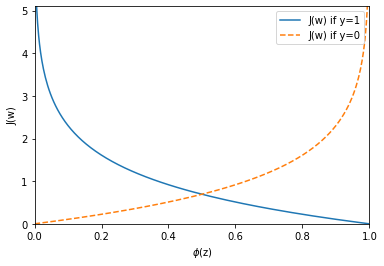

In [16]:
def cost_1(z):
    return -np.log(sigmoid(z))
def cost_0(z):
    return -np.log(1-sigmoid(z))
z=np.arange(-10,10,0.1)
phi_z=sigmoid(z)
c1=[cost_1(x) for x in z]
plt.plot(phi_z,c1,label='J(w) if y=1')
c0=[cost_0(x) for x in z]
plt.plot(phi_z,c0,linestyle='--',label='J(w) if y=0')
plt.ylim(0.0,5.1)
plt.xlim(0,1)
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.show()

In [17]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    
    def fit(self,X,y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,
                            size=1+X.shape[1])
        self.cost_=[]
        for i in range(self.n_iter):
            net_input=self.net_input(X)
            output=self.activation(net_input)
            errors=(y-output)
            self.w_[1:]+=self.eta*X.T.dot(errors)
            self.w_[0]+=self.eta*errors.sum()
            
            cost=(-y.dot(np.log(output))-
                  ((1-y).dot(np.log(1-output))))
            self.cost_.append(cost)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    def activation(self, z):
        return 1./(1.+np.exp(-np.clip(z,-250,250)))
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,0)
        #equivalente a:
        #return np.where(self.activation(self.net_input(X))
        #                >=0.5,1,0)

/tmp/ipykernel_2202/3352630710.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],


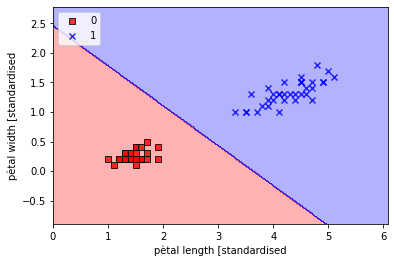

In [18]:
X_train_01_subset=X_train[(y_train==0)|(y_train==1)]
y_train_01_subset=y_train[(y_train==0)|(y_train==1)]
lrgd=LogisticRegressionGD(eta=0.05,n_iter=1000,random_state=1)
lrgd.fit(X_train_01_subset,y_train_01_subset)
plot_decision_regions(X=X_train_01_subset,y=y_train_01_subset,classifier=lrgd)
plt.xlabel('pètal length [standardised')
plt.ylabel('pètal width [standardised')
plt.legend(loc='upper left')
plt.show()

/tmp/ipykernel_2202/3352630710.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],


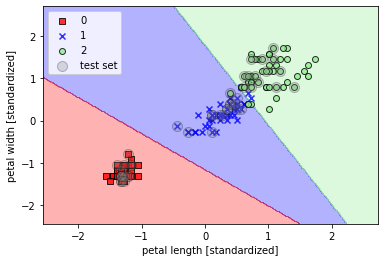

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [20]:
lr.predict_proba(X_test_std[:3,:])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [21]:
lr.predict_proba(X_test_std[:3,:]).sum(axis=1)

array([1., 1., 1.])

In [22]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0])

In [23]:
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

In [24]:
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])

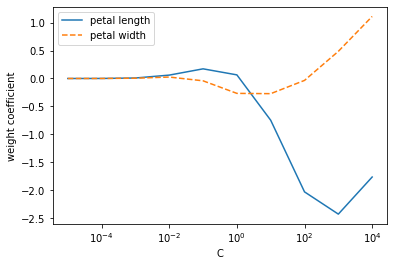

In [25]:
weights, params = [], []
for c in np.arange(-5,5):
    lr=LogisticRegression(C=10.**c,random_state=1)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights=np.array(weights)
plt.plot(params,weights[:,0],label='petal length')
plt.plot(params,weights[:,1],linestyle='--',label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

/tmp/ipykernel_2202/3352630710.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],


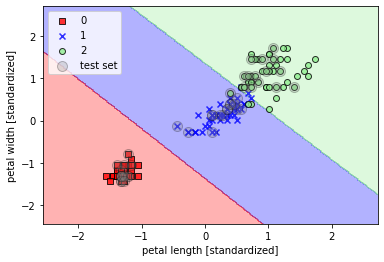

In [26]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [27]:
from sklearn.linear_model import SGDClassifier
ppn=SGDClassifier(loss='perceptron')
lr=SGDClassifier(loss='log')
svm=SGDClassifier(loss='hinge')

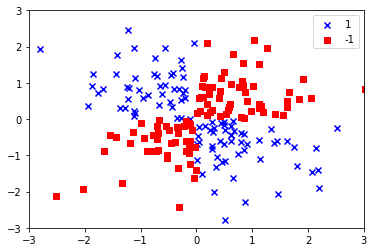

In [28]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor=np.random.randn(200,2)
y_xor=np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
y_xor=np.where(y_xor,1,-1)
plt.scatter(X_xor[y_xor==1,0],
            X_xor[y_xor==1,1],
            c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor==-1,0],
            X_xor[y_xor==-1,1],
            c='r',marker='s',label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.show()

/tmp/ipykernel_2202/3352630710.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],


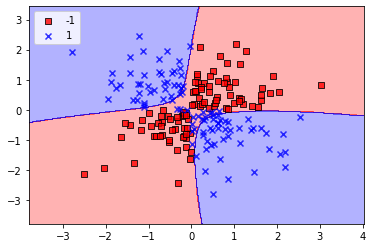

In [29]:
svm=SVC(kernel='rbf',random_state=1,gamma=0.10,C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.show()

/tmp/ipykernel_2202/3352630710.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],


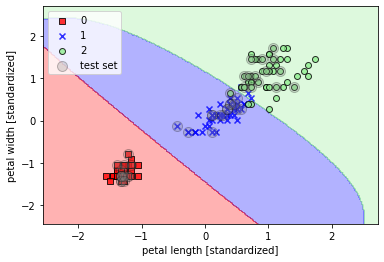

In [30]:
svm=SVC(kernel='rbf',random_state=1,gamma=0.2,C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

/tmp/ipykernel_2202/3352630710.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],


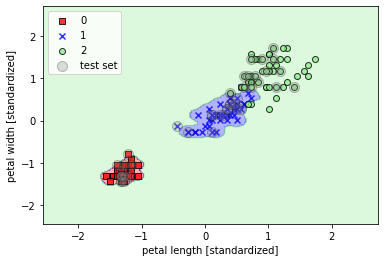

In [31]:
svm=SVC(kernel='rbf',random_state=1,gamma=100.0,C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

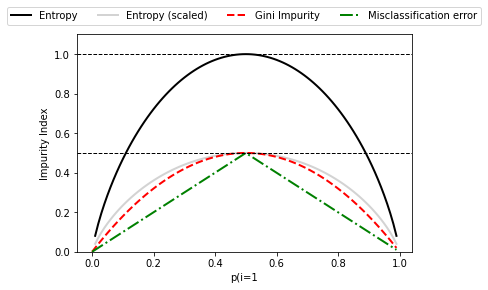

In [32]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
    return (p)*(1-(p))+(1-p)*(1-(1-p))
def entropy(p):
    return -p*np.log2(p)-(1-p)*np.log2((1-p))
def error(p):
    return 1-np.max([p,1-p])
x=np.arange(0.0,1.0,0.01)
ent=[entropy(p) if p!=0 else None for p in x]
sc_ent=[e*0.5 if e else None for e in ent]
err=[error(i) for i in x]
fig=plt.figure()
ax=plt.subplot(111)
for i,lab,ls,c, in zip([ent,sc_ent,gini(x),err],
                       ['Entropy','Entropy (scaled)',
                       'Gini Impurity',
                       'Misclassification error'],
                       ['-','-','--','-.'],
                       ['black','lightgray','red','green','cyan']):
    line=ax.plot(x,i,label=lab,linestyle=ls,lw=2,color=c)
ax.legend(loc='upper center',bbox_to_anchor=(0.5,1.15),
          ncol=5,fancybox=True,shadow=False)
ax.axhline(y=0.5,linewidth=1,color='k',linestyle='--')
ax.axhline(y=1.0,linewidth=1,color='k',linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1')
plt.ylabel('Impurity Index')
plt.show()

/tmp/ipykernel_2202/3352630710.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],


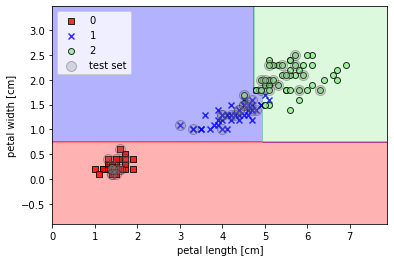

In [33]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree.fit(X_train,y_train)
X_combined=np.vstack((X_train,X_test))
y_combined=np.hstack((y_train,y_test))
plot_decision_regions(X_combined,y_combined,classifier=tree,test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [36]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data=export_graphviz(tree,
                         filled=True,
                         rounded=True,
                         class_names=['Setosa','Versicolor','Virginica'],
                         feature_names=['petal length','petal width'],
                         out_file=None)
graph=graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

/tmp/ipykernel_2202/3352630710.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],


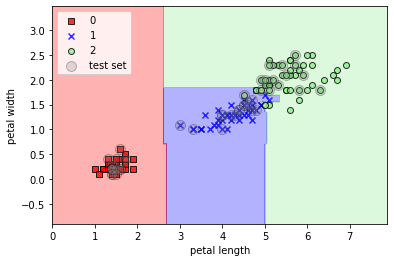

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(criterion='gini',
                              n_estimators=25,
                              random_state=1,
                              n_jobs=2)
forest.fit(X_train,y_train)
plot_decision_regions(X_combined,y_combined,
                      classifier=forest,test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

/tmp/ipykernel_2202/3352630710.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],


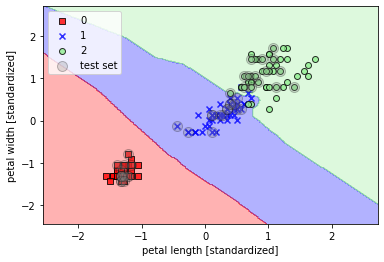

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,
                      classifier=knn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()